# Analysis and Visualization with python

Heart disease or Cardiovascular disease (CVD) is a class of diseases that involve the heart or blood vessels. Cardiovascular diseases are the leading cause of death globally. This is true in all areas of the world except Africa. Together CVD resulted in 17.9 million deaths (32.1%) in 2015. Deaths, at a given age, from CVD are more common and have been increasing in much of the developing world, while rates have declined in most of the developed world since the 1970s.

So, in this kernel, I have conducted Exploratory Data Analysis or EDA of the heart disease dataset. Exploratory Data Analysis or EDA is a critical first step in analyzing a new dataset. The primary objective of EDA is to analyze the data for distribution, outliers and anomalies in the dataset. It enable us to direct specific testing of the hypothesis. It includes analysing the data to find the distribution of data, its main characteristics, identifying patterns and visualizations. It also provides tools for hypothesis generation by visualizing and understanding the data through graphical representation.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

I have imported the libraries and the next step is to import the dataset

# Import dataset

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\Arun DS\Task 18-30\TASK- 20 to 30\heart-disease-uci_ TASK 24\heart.csv')

# Exploratory data analysis - EDA

Check shape of the dataset 

==>It is a good idea to first check the shape of the dataset.

In [3]:
df.shape

(303, 14)

Now, we can see that the dataset contains 303 instances and 14 variables.

In [4]:
#preview dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


The dataset contains several columns which are as follows -

--age : age in years

--sex : (1 = male; 0 = female)

--cp : chest pain type

--trestbps : resting blood pressure (in mm Hg on admission to the hospital)

--chol : serum cholestoral in mg/dl

--fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

--restecg : resting electrocardiographic results

--thalach : maximum heart rate achieved

--exang : exercise induced angina (1 = yes; 0 = no)

--oldpeak : ST depression induced by exercise relative to rest

--slope : the slope of the peak exercise ST segment

--ca : number of major vessels (0-3) colored by flourosopy

--thal : 3 = normal; 6 = fixed defect; 7 = reversable defect

--target : 1 or 0

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Important points about dataset : 

sex is a character variable. Its data type should be object. But it is encoded as (1 = male; 0 = female). So, its data type is given as int64.

Same is the case with several other variables - fbs, exang and target.

fbs (fasting blood sugar) should be a character variable as it contains only 0 and 1 as values (1 = true; 0 = false). As it contains only 0 and 1 as values, so its data type is given as int64.

exang (exercise induced angina) should also be a character variable as it contains only 0 and 1 as values (1 = yes; 0 = no). It also contains only 0 and 1 as values, so its data type is given as int64.

target should also be a character variable. But, it also contains 0 and 1 as values. So, its data type is given as int64.

In [8]:
#Statistical properties of dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Important points to note :

The above command df.describe() helps us to view the statistical properties of numerical variables. It excludes character variables.

If we want to view the statistical properties of character variables, we should run the following command -

df.describe(include=['object'])

If we want to view the statistical properties of all the variables, we should run the following command -

df.describe(include='all')

In [9]:
#view column names
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Univariate Analysis

Analysis of target feature variable 

Our feature variable of interest is target.

It refers to the presence of heart disease in the patient.

It is integer valued as it contains two integers 0 and 1 - (0 stands for absence of heart disease and 1 for presence of heart disease).

So, in this section, I will analyze the target variable.

In [10]:
#Check the number of unique values in target variable
df['target'].nunique()

2

We can see there are 2 unique values in the target variable

In [14]:
#View the unique values in target variable
df['target'].unique()

array([1, 0], dtype=int64)

Comment:  
So, the unique values are 1 and 0. (1 stands for presence of heart disease and 0 for absence of hear disease).

In [15]:
#Frequency distribution of target variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Comment:  
1 stands for presence of heart disease. So, there are 165 patients suffering from heart disease.

Similarly, 0 stands for absence of heart disease. So, there are 138 patients who do not have any heart disease.

We can visualize this information below

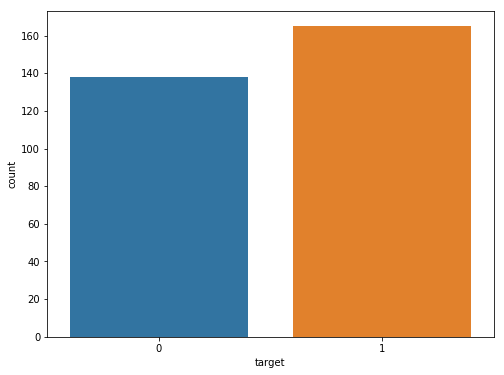

In [18]:
ax=plt.subplots(figsize=(8,6))
ax=sns.countplot('target',data=df)
plt.show()

Interpretation:  
The above plot confirms the findings that -

There are 165 patients suffering from heart disease, and

There are 138 patients who do not have any heart disease.

In [24]:
#Frequency distribution of target variable wrt sex
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

Comment:  
sex variable contains two integer values 1 and 0 : (1 = male; 0 = female).

target variable also contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

So, out of 96 females - 72 have heart disease and 24 do not have heart disease.

Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.

We can visualize this information below.

We can visualize the value counts of the sex variable wrt target as follows -

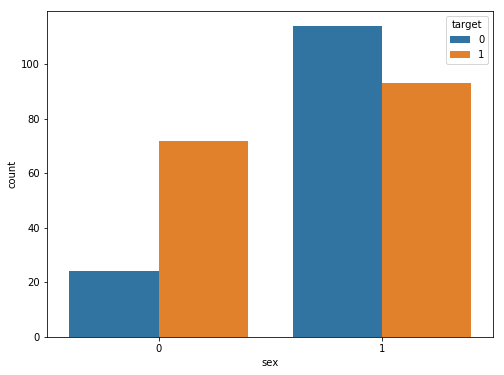

In [25]:
ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='sex',hue='target',data=df)
plt.show()

Interpretation:  
We can see that the values of target variable are plotted wrt sex : (1 = male; 0 = female).

target variable also contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

The above plot confirms our findings that -

Out of 96 females - 72 have heart disease and 24 do not have heart disease.

Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.

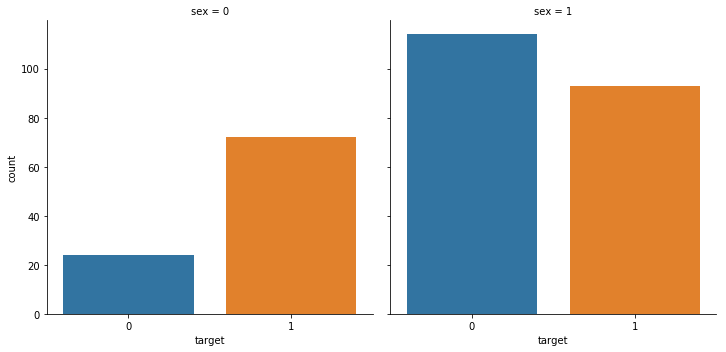

In [26]:
ax=sns.catplot(x='target',col='sex',data=df,kind='count',height=5,aspect=1)

Comment:  
The above plot segregate the values of target variable and plot on two different columns labelled as (sex = 0, sex = 1).

I think it is more convinient way of interpret the plots.



We can plot the bars horizontally as follows :

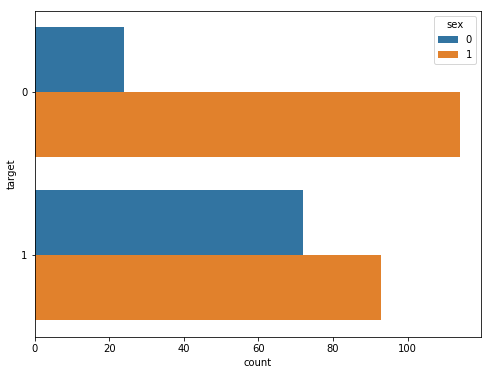

In [37]:
ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(y='target',hue='sex',data=df)
plt.show()

We can use a different color palette as follows :

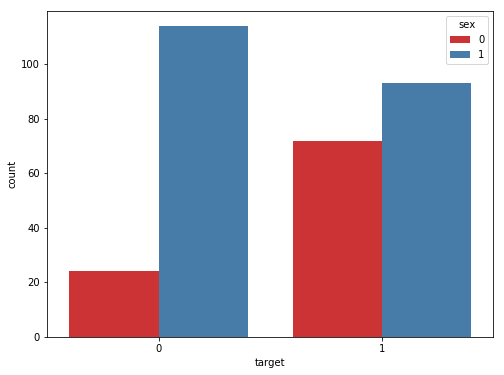

In [49]:
ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',hue='sex',data=df,palette='Set1')

We can use plt.bar keyword arguments for a different look :

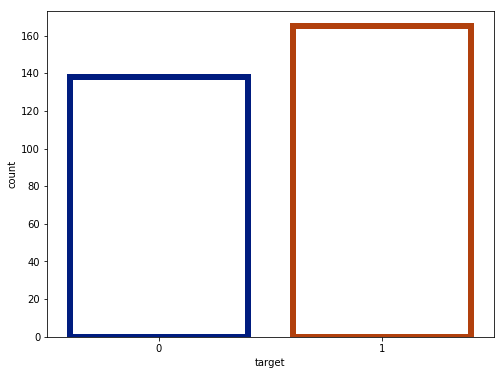

In [54]:
ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',data=df,facecolor=(0,0,0,0),linewidth=6,edgecolor=sns.color_palette('dark',3))

Comment:  
I have visualize the target values distribution wrt sex.

We can follow the same principles and visualize the target values distribution wrt fbs (fasting blood sugar) and exang (exercise induced angina).

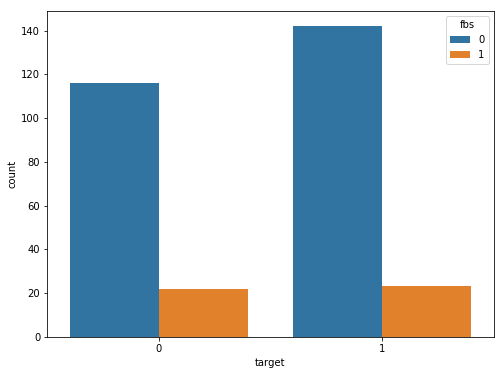

In [65]:
ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',hue='fbs',data=df)

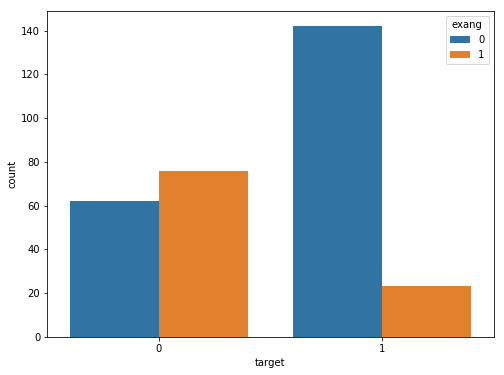

In [66]:
ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',hue='exang',data=df)

Findings of Univariate Analysis:   
Findings of univariate analysis are as follows:-

Our feature variable of interest is target.

It refers to the presence of heart disease in the patient.

It is integer valued as it contains two integers 0 and 1 - (0 stands for absence of heart disease and 1 for presence of heart disease).

1 stands for presence of heart disease. So, there are 165 patients suffering from heart disease.

Similarly, 0 stands for absence of heart disease. So, there are 138 patients who do not have any heart disease.

There are 165 patients suffering from heart disease, and

There are 138 patients who do not have any heart disease.

Out of 96 females - 72 have heart disease and 24 do not have heart disease.

Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.

# Bivariate Analysis

Estimate correlation coefficients :  
Our dataset is very small. So, I will compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. I will compute it using the df.corr() method as follows:-

In [69]:
correlation=df.corr()

The target variable is target. So, we should check how each attribute correlates with the target variable. We can do it as follows:-

In [71]:
correlation['target'].value_counts(ascending=False)

-0.430696    1
-0.144931    1
-0.344029    1
-0.436757    1
 0.433798    1
-0.391724    1
-0.028046    1
 0.345877    1
-0.085239    1
 0.421741    1
 0.137230    1
-0.280937    1
 1.000000    1
-0.225439    1
Name: target, dtype: int64

Interpretation of correlation coefficient: 
    
The correlation coefficient ranges from -1 to +1.

When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is no variable which has strong positive correlation with target variable.

When it is clsoe to -1, it means that there is a strong negative correlation. So, we can see that there is no variable which has strong negative correlation with target variable.

When it is close to 0, it means that there is no correlation. So, there is no correlation between target and fbs.

We can see that the cp and thalach variables are mildly positively correlated with target variable. So, I will analyze the interaction between these features and target variable.

Explore cp variable:   
cp stands for chest pain type.

First, I will check number of unique values in cp variable.

In [74]:
df['cp'].nunique()

4

So, there are 4 unique values in cp variable. Hence, it is a categorical variable.

Now, I will view its frequency distribution as follows:

In [75]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Comment:    
It can be seen that cp is a categorical variable and it contains 4 types of values - 0, 1, 2 and 3.

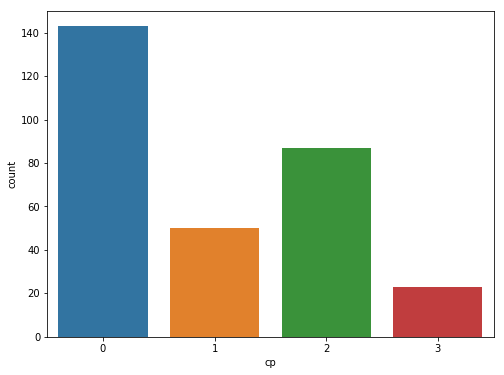

In [76]:
ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='cp',data=df)

Frequency distribution of target variable wrt cp

In [77]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

Comment:   
cp variable contains four integer values 0, 1, 2 and 3.

target variable contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

So, the above analysis gives target variable values categorized into presence and absence of heart disease and groupby cp variable values.

We can visualize this information below.

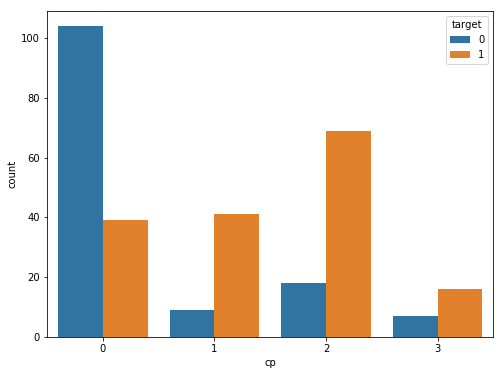

In [80]:
ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='cp',hue='target',data=df)

Interpretation:    
We can see that the values of target variable are plotted wrt cp.

target variable contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

The above plot confirms our above findings,

Alternatively, we can visualize the same information as follows: 

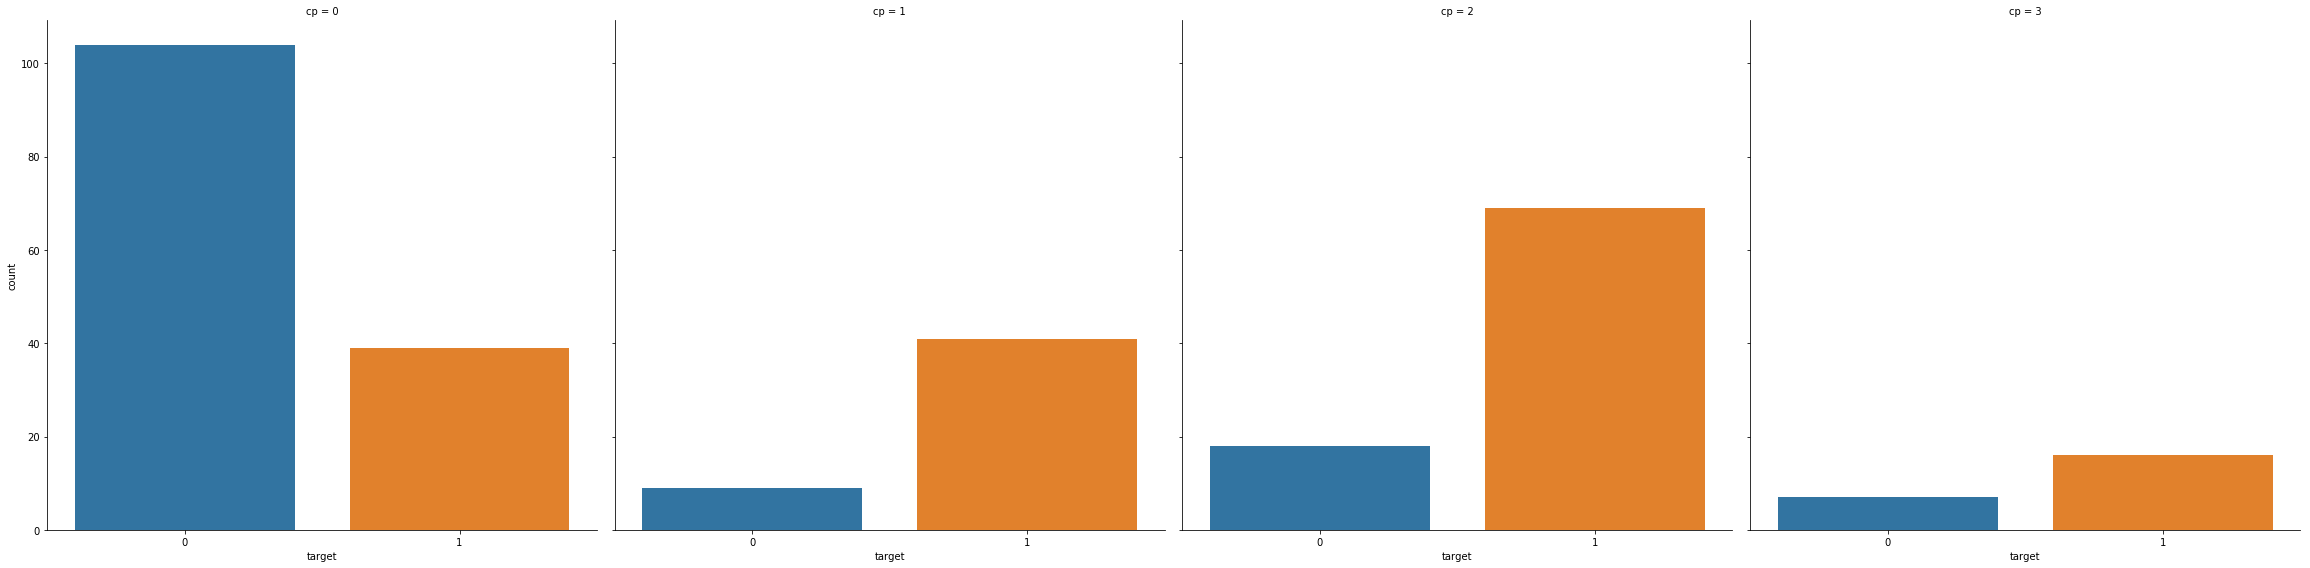

In [84]:
ax=sns.catplot(x='target',col='cp',data=df,kind='count',height=8,aspect=1)

Analysis of target and thalach variable: 

Explore thalach variable
thalach stands for maximum heart rate achieved.

I will check number of unique values in thalach variable as follows :

In [87]:
df['thalach'].nunique()

91

--So, number of unique values in thalach variable is 91. Hence, it is numerical variable.

--I will visualize its frequency distribution of values as follows :



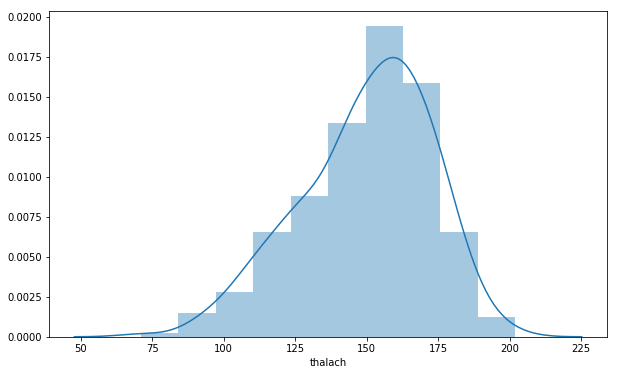

In [88]:
ax=plt.subplots(figsize=(10,6))
x=df['thalach']
ax=sns.distplot(x,bins=10)
plt.show()

Comment:  
We can see that the thalach variable is slightly negatively skewed.

We can use Pandas series object to get an informative axis label as follows :

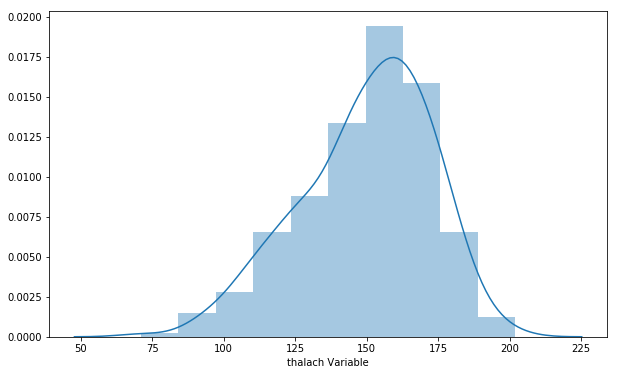

In [94]:
ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach Variable')
ax=sns.distplot(x,bins=10)

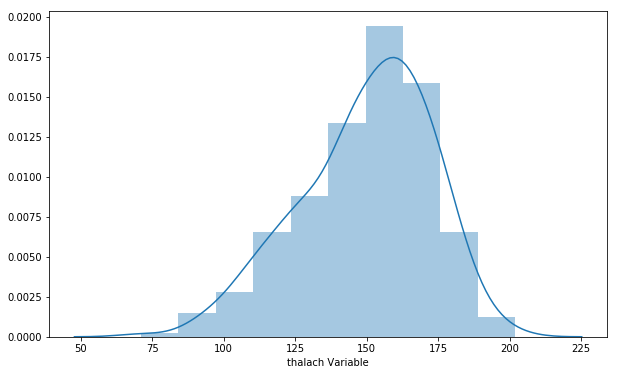

In [95]:
ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach Variable')
ax=sns.distplot(x,bins=10)

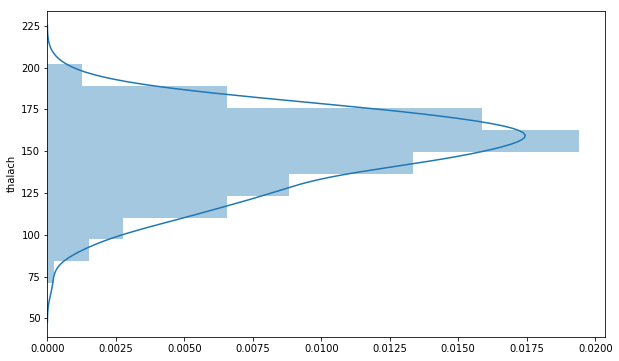

In [101]:
ax=plt.subplots(figsize=(10,6))
x=df['thalach']
ax=sns.distplot(x,bins=10,vertical=True)

Seaborn Kernel Density Estimation (KDE) Plot 

The kernel density estimate (KDE) plot is a useful tool for plotting the shape of a distribution.

The KDE plot plots the density of observations on one axis with height along the other axis.

We can plot a KDE plot as follows :

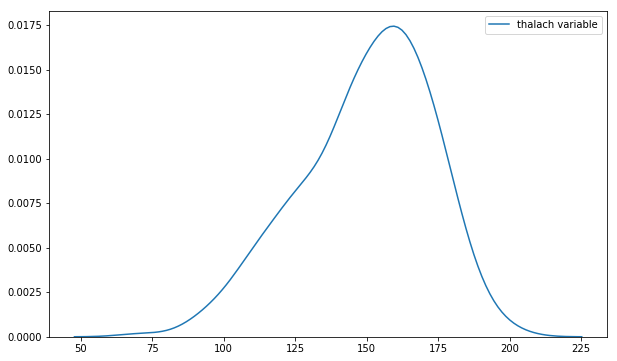

In [103]:
ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax=sns.kdeplot(x)

We can shade under the density curve and use a different color as follows:

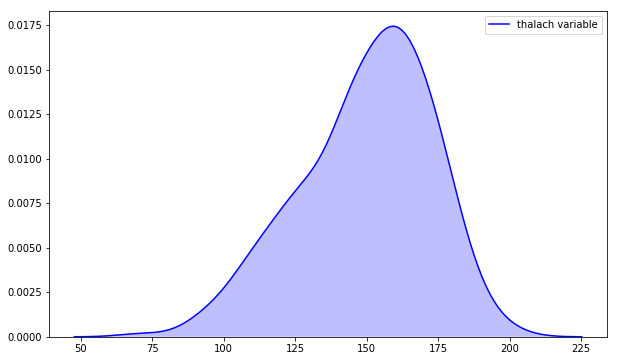

In [106]:
ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax=sns.kdeplot(x,shade=True,color='b')

Histogram: 
    
A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

We can plot a histogram as follows :

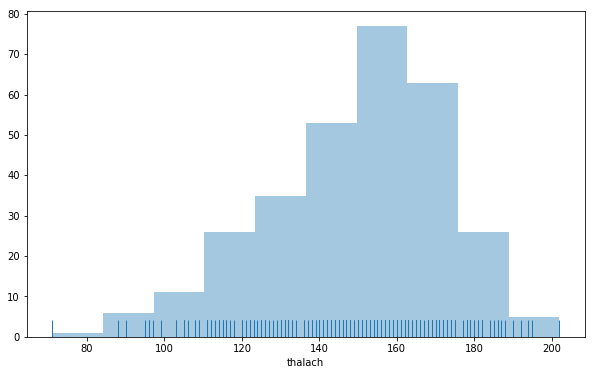

In [107]:
ax=plt.subplots(figsize=(10,6))
x=df['thalach']
ax=sns.distplot(x,kde=False,rug=True,bins=10)

Visualize frequency distribution of thalach variable wrt target

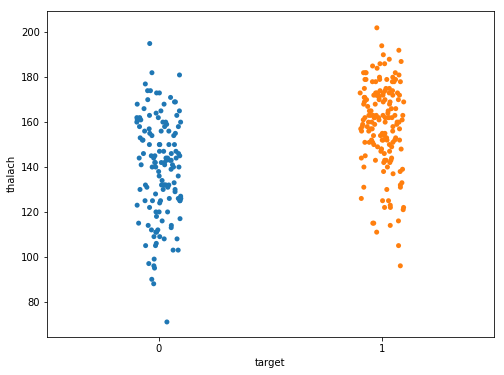

In [109]:
ax=plt.subplots(figsize=(8,6))
sns.stripplot(x='target',y='thalach',data=df)
plt.show()

Interpretation:
    
We can see that those people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).


We can add jitter to bring out the distribution of values as follows :

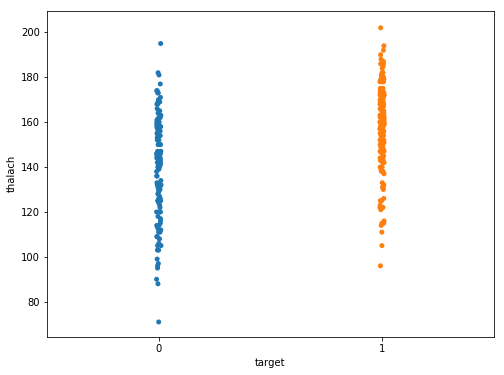

In [111]:
ax=plt.subplots(figsize=(8,6))
sns.stripplot(x='target',y='thalach',data=df,jitter=0.01)
plt.show()

Visualize distribution of thalach variable wrt target with boxplot

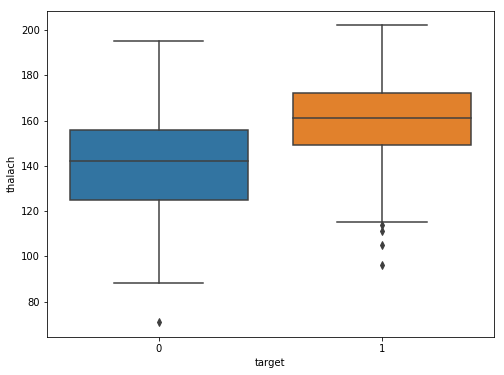

In [115]:
ax=plt.subplots(figsize=(8,6))
ax=sns.boxplot(x='target',y='thalach',data=df)

Interpretation:   
The above boxplot confirms our finding that people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

Findings of Bivariate Analysis :   
    
Findings of Bivariate Analysis are as follows –

--There is no variable which has strong positive correlation with target variable.

--There is no variable which has strong negative correlation with target variable.

--There is no correlation between target and fbs.

--The cp and thalach variables are mildly positively correlated with target variable.

--We can see that the thalach variable is slightly negatively skewed.

--The people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

--The people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

# Multivariate Analysis

The objective of the multivariate analysis is to discover patterns and relationships in the dataset.

An important step in EDA is to discover patterns and relationships between variables in the dataset.

I will use heat map and pair plot to discover the patterns and relationships in the dataset.

First of all, I will draw a heat map.

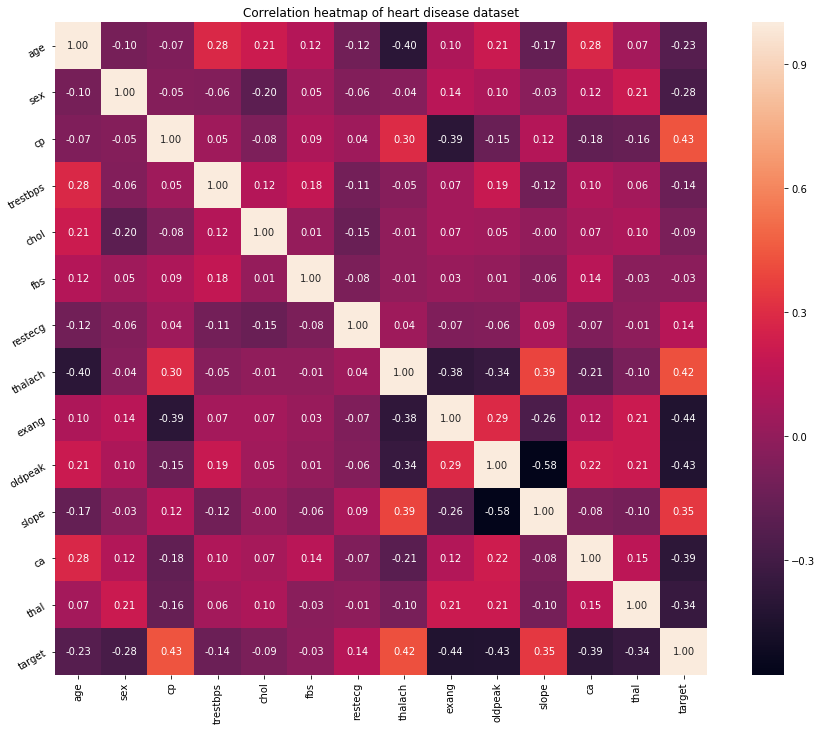

In [117]:
plt.figure(figsize=(16,12))
plt.title('Correlation heatmap of heart disease dataset')
a=sns.heatmap(correlation,square=True,annot=True,fmt='.2f',linecolor='white')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.show()

Interpretation: 
    
From the above correlation heat map, we can conclude that :-

target and cp variable are mildly positively correlated (correlation coefficient = 0.43).

target and thalach variable are also mildly positively correlated (correlation coefficient = 0.42).

target and slope variable are weakly positively correlated (correlation coefficient = 0.35).

target and exang variable are mildly negatively correlated (correlation coefficient = -0.44).

target and oldpeak variable are also mildly negatively correlated (correlation coefficient = -0.43).

target and ca variable are weakly negatively correlated (correlation coefficient = -0.39).

target and thal variable are also waekly negatively correlated (correlation coefficient = -0.34).

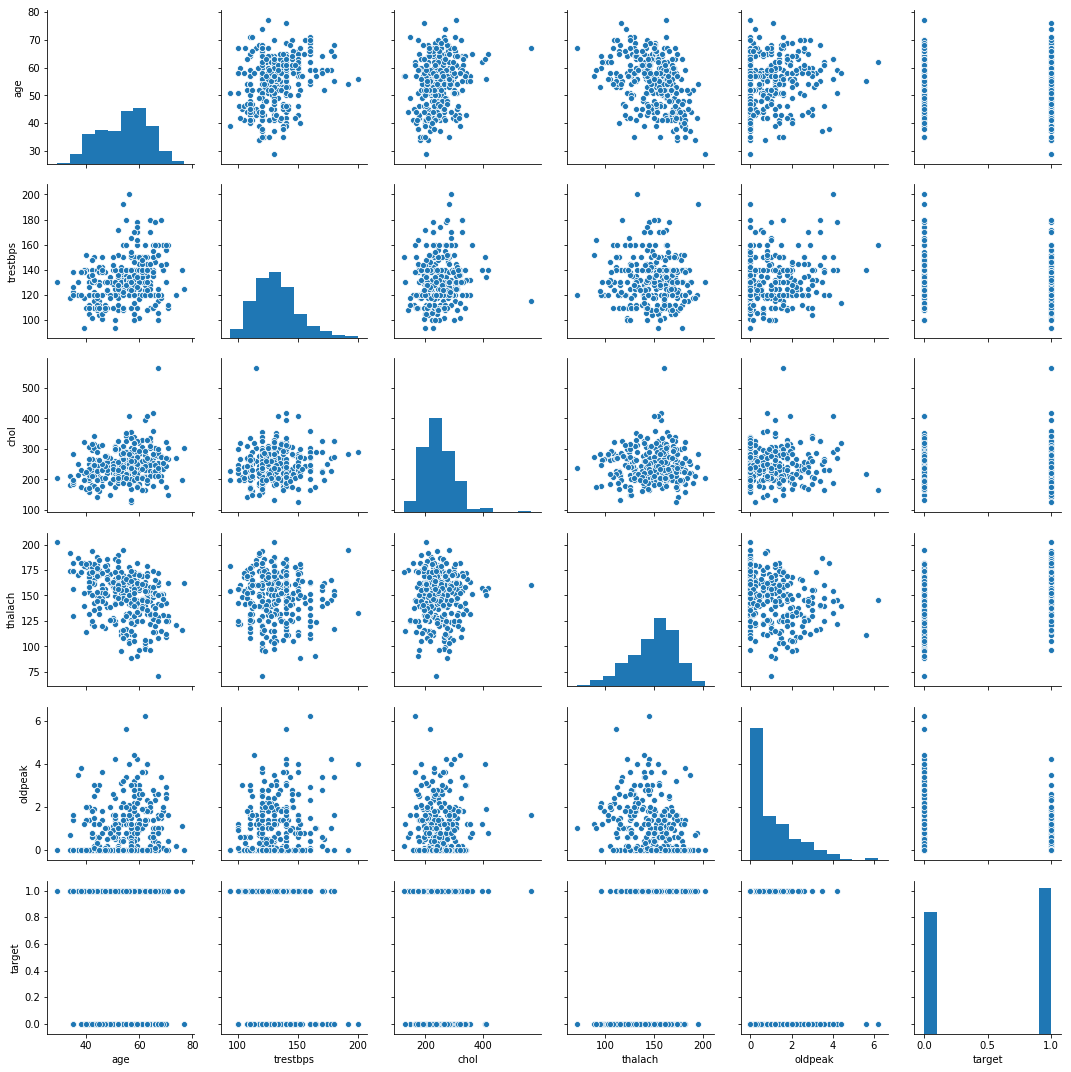

In [119]:
num_var=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df[num_var],kind='scatter',diag_kind='hist')
plt.show()

Comment:
    
-->I have defined a variable num_var. Here age, trestbps, chol`, `thalach` and `oldpeak are numerical variables and target is the categorical variable.

-->So, I wll check relationships between these variables.

Analysis of age and other variables

Check the number of unique values in age variable

In [121]:
df['age'].nunique()

41

View statistical summary of age variable

In [123]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

Interpretation: 
    
The mean value of the age variable is 54.37 years.

The minimum and maximum values of age are 29 and 77 years.

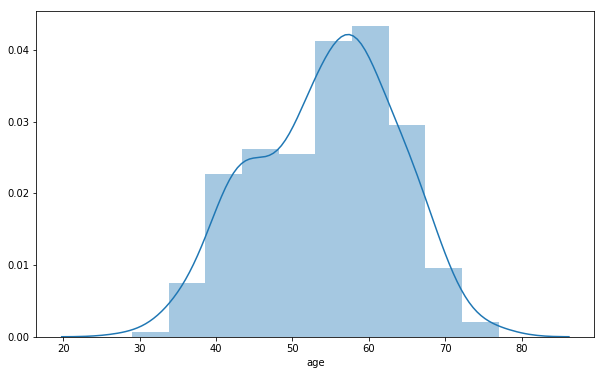

In [126]:
ax=plt.subplots(figsize=(10,6))
x=df['age']
ax=sns.distplot(x,bins=10)
plt.show()

Interpretation:   
The age variable distribution is approximately normal.

Analyze age and target variable:


Visualize frequency distribution of age variable wrt target

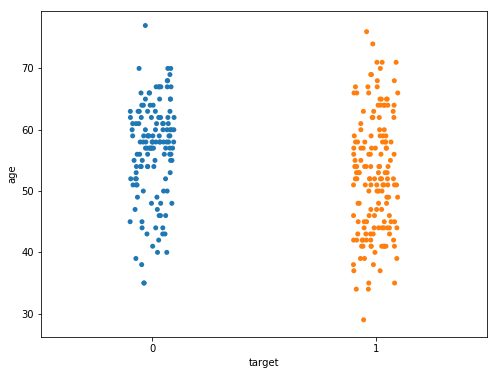

In [128]:
ax=plt.subplots(figsize=(8,6))
sns.stripplot(x='target',y='age',data=df)
plt.show()

Interpretation:
    
We can see that the people suffering from heart disease (target = 1) and people who are not suffering from heart disease (target = 0) have comparable ages.

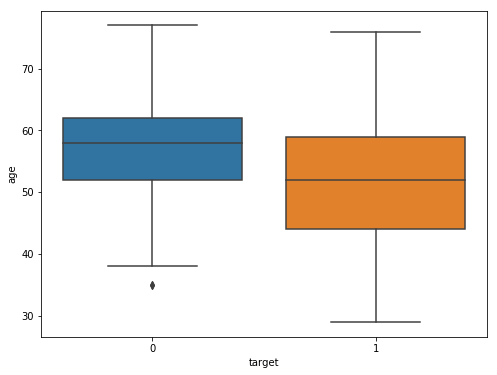

In [129]:
ax=plt.subplots(figsize=(8,6))
ax=sns.boxplot(x='target',y='age',data=df)
plt.show()

Interpretation: 
    
The above boxplot tells two different things :

The mean age of the people who have heart disease is less than the mean age of the people who do not have heart disease.

The dispersion or spread of age of the people who have heart disease is greater than the dispersion or spread of age of the people who do not have heart disease.

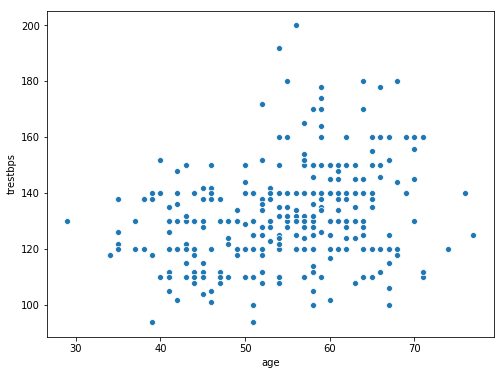

In [133]:
ax=plt.subplots(figsize=(8,6))
ax=sns.scatterplot(x='age',y='trestbps',data=df)
plt.show()

Interpretation: 
    
The above scatter plot shows that there is no correlation between age and trestbps variable.

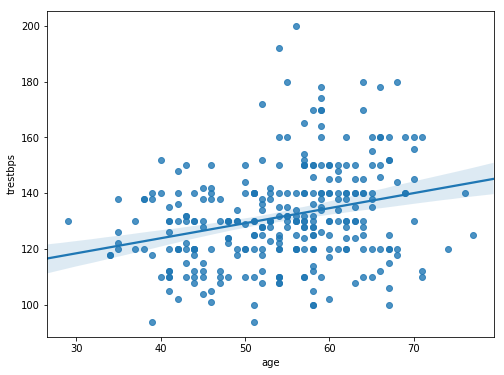

In [134]:
ax=plt.subplots(figsize=(8,6))
ax=sns.regplot(x='age',y='trestbps',data=df)
plt.show()

Interpretation:
    
The above line shows that linear regression model is not good fit to the data.

Analyze age and chol variable : -

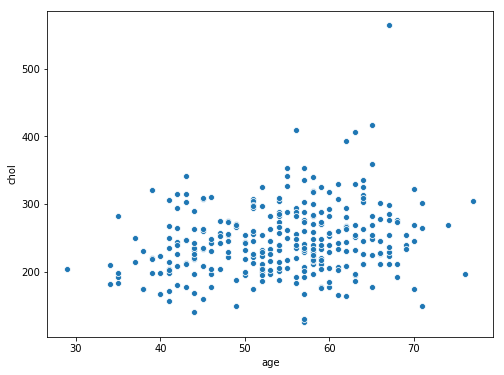

In [135]:
ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="chol", data=df)
plt.show()

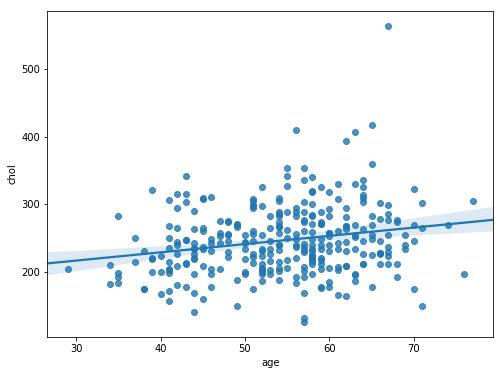

In [136]:
ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="chol", data=df)
plt.show()

Interpretation:
    
The above plot confirms that there is a slighly positive correlation between age and chol variables.

Analyze chol and thalach variable:-

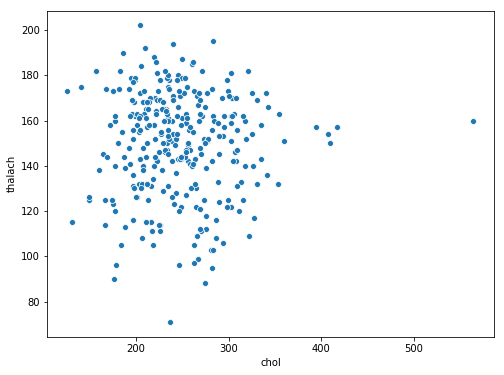

In [137]:
ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="chol", y = "thalach", data=df)
plt.show()

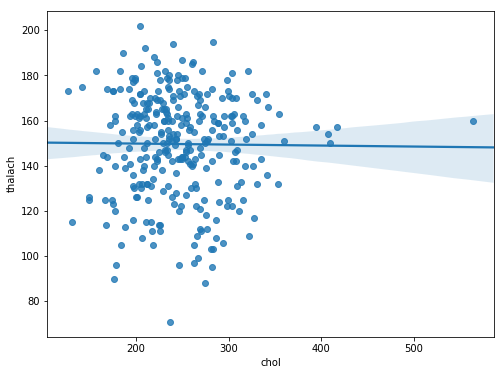

In [138]:
 ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="chol", y="thalach", data=df)
plt.show()

Interpretation:
    
The above plot shows that there is no correlation between chol and thalach variable

# Dealing with missing values

In Pandas missing data is represented by two values:

None: None is a Python singleton object that is often used for missing data in Python code.

NaN : NaN (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation.

There are different methods in place on how to detect missing values.

In [140]:
#checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Interpretation:
    
We can see that there are no missing values in the dataset.

Check with ASSERT statement : 

We must confirm that our dataset has no missing values.

We can write an assert statement to verify this.

We can use an assert statement to programmatically check that no missing, unexpected 0 or negative values are present.

This gives us confidence that our code is running properly.

Assert statement will return nothing if the value being tested is true and will throw an AssertionError if the value is false.

Asserts

assert 1 == 1 (return Nothing if the value is True)

assert 1 == 2 (return AssertionError if the value is False)

In [141]:
#assert that there are no missing values in the dataframe
assert pd.notnull(df).all().all()

In [142]:
#assert all values are greater than or equal to 0
assert(df>=0).all().all()

Interpretation:
    
The above two commands do not throw any error. Hence, it is confirmed that there are no missing or negative values in the dataset.

All the values are greater than or equal to zero.

# Outlier detection

I will make boxplots to visualise outliers in the continuous numerical variables : -

age, trestbps, chol, thalach and oldpeak variables.

In [143]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

Box-plot of age variable

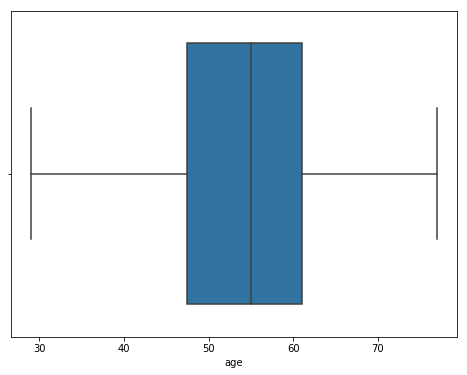

In [144]:
ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["age"])
plt.show()

trestbps variable

In [145]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

Box-plot of trestbps variable

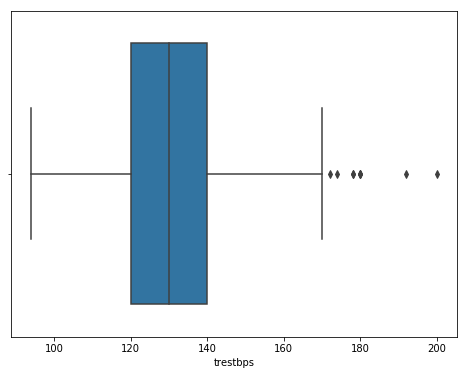

In [146]:
ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["trestbps"])
plt.show()

chol variable

In [147]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

Box-plot of chol variable

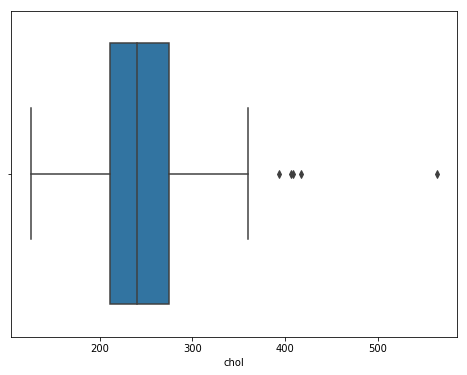

In [149]:
ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["chol"])
plt.show()

thalach variable

In [150]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

Box-plot of thalach variable

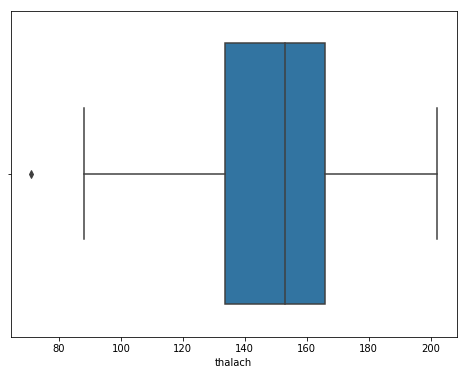

In [151]:
ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["thalach"])
plt.show()

oldpeak variable

In [152]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

Box-plot of oldpeak variable

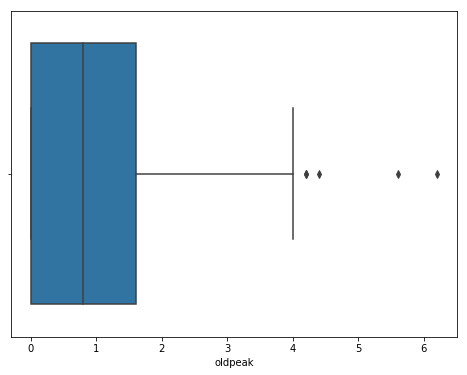

In [153]:
ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["oldpeak"])
plt.show()

Findings:  
    
-->The age variable does not contain any outlier.

-->trestbps variable contains outliers to the right side.

-->chol variable also contains outliers to the right side.

-->thalach variable contains a single outlier to the left side.

-->oldpeak variable contains outliers to the right side.

Those variables containing outliers needs further investigation.

# Conclusion 

# References